In [22]:
import pandas as pd
import json

def csv_to_dict(csv_file):
    data = []
    df = pd.read_csv(csv_file, delimiter='\t')
    for index, row in df.iterrows():
        file_name = row['file_name']
        label = row['misogynous']
        # text_input = row['Text Transcription']
        data.append(
            {'image_name': file_name,
            'class_label': label,
            # 'text_input': text_input
            })
    return data

# Provide the path to your CSV file
csv_file_path = '../MAMI/test_data/test_gold.csv'

# Convert CSV to dictionary
data_list = csv_to_dict(csv_file_path)

# Save dictionary as JSON
# json_file_path = '../MAMI/test_data/test_gold.json'
# with open(json_file_path, 'w') as file:
#     for item in data_list:
#         json.dump(item, file)
#         file.write('\n')

In [33]:
text_input_dicts = []
with open("/home/marvinpeng/wikidata5m/peng/checkthat/MetaVerseofNLU/MAMI/test_data/test.json", "r") as f:
    lines = f.readlines()
    for l in lines:    
        text_input_dicts.append(json.loads(l))

In [29]:
data_list[0]

{'image_name': '15236.jpg', 'class_label': 0}

In [38]:
new_dict_list = []
for text_input_dict, label_dict in zip(text_input_dicts, data_list):
    assert text_input_dict['image_name'] == label_dict['image_name']
    text_input_dict['class_label'] = str(label_dict['class_label'])
    new_dict_list.append(text_input_dict)

In [40]:
json_file_path = '../MAMI/test_data/test_gold.json'
with open(json_file_path, 'w') as file:
    for item in new_dict_list:
        json.dump(item, file)
        file.write('\n')

In [16]:
import json

with open("../MAMI/train_data/dev.json", "r") as f:
    dev_set = f.readlines()
    dev_list = []
    for l in dev_set:
        dev_dict = json.loads(l)
        dev_dict["class_label"] = str(dev_dict['class_label'])
        dev_list.append(dev_dict)

In [11]:
new_dev_list = []
for new_dev_dict in dev_list:
    # l = new_dev_dict.pop("label")
    new_dev_list.append(new_dev_dict)

In [17]:
json_file_path = '../MAMI/train_data/dev.json'
with open(json_file_path, 'w') as file:
    for item in dev_list:
        json.dump(item, file)
        file.write('\n')

In [ ]:
MAMI/train_data/images_labeled/train

In [10]:
import shutil
import os

for data in dev_list:
    img_name = data['image_name']
    if img_name in os.listdir("../MAMI/train_data/images_labeled/train"):
        shutil.move("../MAMI/train_data/images_labeled/train/{}".format(img_name), "../MAMI/train_data/images_labeled/dev/{}".format(img_name))

In [3]:
json_file_path = 'mami_labels.jsonl'
with open(json_file_path, 'w') as f:
    f.writelines(data_dict)

In [ ]:
# Write the dictionaries to CSV file
with open(output_csv_path, 'w', newline='') as file:
    fieldnames = ['file_name', 'label', 'text_input']
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(data_list)


In [8]:
import random

random.shuffle(data_list)  # Shuffle the data randomly

total_samples = len(data_list)
train_samples = int(0.8 * total_samples)
dev_samples = int(0.1 * total_samples)
test_samples = int(0.1 * total_samples)

train_set = data_list[:train_samples]
dev_set = data_list[train_samples:train_samples + dev_samples]
test_set = data_list[train_samples + dev_samples:]

# Save each set to separate files
train_filename = "train.json"
dev_filename = "dev.json"
test_filename = "test.json"

# Function to save a set to a file
def save_set_to_file(dataset, filename):
    with open(filename, 'w') as file:
        for item in dataset:
            json.dump(item, file)
            file.write('\n')

# Save each set to a file
save_set_to_file(train_set, train_filename)
save_set_to_file(dev_set, dev_filename)
save_set_to_file(test_set, test_filename)


In [1]:
train_ocr = '/home/marvinpeng/wikidata5m/peng/checkthat/MetaVerseofNLU/MAMI/train_data/ocr_results.json'
test_ocr = '/home/marvinpeng/wikidata5m/peng/checkthat/MetaVerseofNLU/MAMI/test_data/ocr_results.json'

In [2]:
import json
with open(train_ocr, 'r') as f:
    train_ocr = json.load(f)
with open(test_ocr, 'r') as f:
    test_ocr = json.load(f)

In [49]:
test_ocr[0]

{'image_name': '17067.jpg',
 'ocr_res': [[[[209, 393], [441, 393], [441, 455], [209, 455]],
   'MAUR Y',
   0.6908351853414325],
  [[[224, 452], [416, 452], [416, 476], [224, 476]],
   "He'$ got a show for that",
   0.7311747735877306],
  [[[3, 493], [197, 493], [197, 511], [3, 511]],
   'VERY DEMOTIVATIONAL',
   0.820648584852664],
  [[[205, 497], [241, 497], [241, 511], [205, 511]],
   'cOm',
   0.666827380657196]]}

In [51]:
train_ocr_results = []
for key, value in train_ocr.items():
    train_ocr_dict = {'image_name': key, 'ocr_res': value}
    train_ocr_results.append(train_ocr_dict)

In [13]:
test_ocr[0]

{'image_name': '17067.jpg',
 'ocr_res': [[[[209, 393], [441, 393], [441, 455], [209, 455]],
   'MAUR Y',
   0.6908351853414325],
  [[[224, 452], [416, 452], [416, 476], [224, 476]],
   "He'$ got a show for that",
   0.7311747735877306],
  [[[3, 493], [197, 493], [197, 511], [3, 511]],
   'VERY DEMOTIVATIONAL',
   0.820648584852664],
  [[[205, 497], [241, 497], [241, 511], [205, 511]],
   'cOm',
   0.666827380657196]]}

In [14]:
total_probs = []
for ocr_res in test_ocr:
    for _ocr in ocr_res['ocr_res']:
        total_probs.append(_ocr[2])

In [15]:
total_probs[:10]

[0.6908351853414325,
 0.7311747735877306,
 0.820648584852664,
 0.666827380657196,
 0.1960705351538346,
 0.0812202252372266,
 0.37175287303304355,
 0.5134183017064777,
 0.8675520839389868,
 0.9128945844004303]

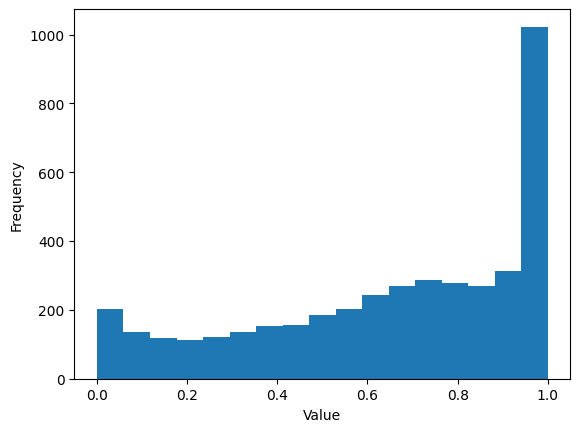

In [16]:
import matplotlib.pyplot as plt

plt.hist(total_probs, bins='auto')

# Set the x and y label
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

In [44]:
ignore_list = ['imgglip', 'imgflip', 'imgtlip','WeKnowMemes', 'net', 'memes', 'com', 'cOm', 'giip', 'c0m', 'www', 'meme', 'imgip', 'makeameme', 'org', 'jpg', 'jpeg', 'Msagur','center', 'quickmeme']

In [52]:

total_train_ocr_results = {}
for ocr_res in train_ocr_results:
    for _ocr in ocr_res['ocr_res']:
        cur_ocr = []
        if _ocr[2]>0.55:
            flag = False
            for _ban_w in ignore_list:
                if _ban_w in _ocr[1].lower():
                    flag=True
                    break
            if not flag:
                cur_ocr.append(_ocr[1].lower())
    total_train_ocr_results[ocr_res['image_name']] = cur_ocr   

In [74]:
print(len(total_train_ocr_results))

10008


In [81]:
import os
with open("/home/marvinpeng/wikidata5m/peng/checkthat/MetaVerseofNLU/MAMI/train_data/merge.json", "r") as f:
    lines = f.readlines()
    new_lines = []
    print(len(lines))
    missing_ents = []
    path_head = 'MAMI/train_data/images_labeled/merge/'
    for l in lines:
        merge_dict = json.loads(l)
        image_name = merge_dict['image_name']
        image_name = os.path.join(path_head, image_name)
        try:
            merge_dict['ocr_text'] = total_train_ocr_results[image_name]
        except KeyError:
            missing_ents.append(image_name)
        else:
            new_lines.append(merge_dict)

10100


In [86]:
with open('merge_ocr_results.json', 'w') as f:
    for l in new_lines:
        json.dump(l, f)
        f.write("\n")

In [80]:
os.path.join(path_head, image_name)

'MAMI/train_data/images_labeled/merge/2403.jpg'

In [79]:
total_train_ocr_results[os.path.join(path_head, image_name)]

['closely ']

In [87]:
len(new_lines)

10100

In [125]:
train_lines[0]

{'image_name': '1.jpg', 'class_label': '0', 'text_input': 'Milk Milk.zip'}

In [124]:
with open("/home/marvinpeng/wikidata5m/peng/checkthat/MetaVerseofNLU/MAMI/train_data/train.json", "r") as f:
    lines = f.readlines()
    train_lines = []
    for l in lines:
        train_lines.append(json.loads(l))
with open("/home/marvinpeng/wikidata5m/peng/checkthat/MetaVerseofNLU/MAMI/train_data/dev.json", "r") as f:
    lines = f.readlines()
    dev_lines = []
    for l in lines:
        dev_lines.append(json.loads(l))
# with open("/home/marvinpeng/wikidata5m/peng/checkthat/MetaVerseofNLU/MAMI/train_data/dev_test.json", "r") as f:
#     lines = f.readlines()
#     dev_test_lines = []
#     for l in lines:
#         dev_test_lines.append(json.loads(l))

In [100]:
merge_dict

{'image_name': '28.jpg',
 'label': 0,
 'text_input': "C BLOCK not now, dad BLOCK stop it, dad LOCK We should burn Jon Snow you know what will happen if he becomes a white walker? he'll become SNOW WHITE SNOW WHITE!",
 'ocr_text': []}

In [93]:
dev_test_lines[0]

{'image_name': '28.jpg',
 'class_label': '0',
 'text_input': "not now, dad. We should burn Jon Snow. stop it dad. you know what will happen if he becomes a white walker? he'll become SNOW WHITE. SNOW WHITE!"}

In [95]:
merge_dict.keys()

dict_keys(['image_name', 'label', 'text_input', 'ocr_text'])

In [96]:
merge_dict_lines = new_lines

In [97]:
merge_dict_lines[0]

{'image_name': '2403.jpg',
 'label': 1,
 'text_input': 'HAPPINESS IS EVERYWHERE YOU JUST NEED TO LOOK CLOSELY',
 'ocr_text': ['closely ']}

In [129]:
new_train_lines = []
for train_line in train_lines:
    image_name = train_line['image_name']
    for merge_dict in merge_dict_lines:
        if image_name == merge_dict['image_name']:
            train_line['ocr_text'] = merge_dict['ocr_text']
            new_train_lines.append(train_line)
            break

In [130]:
len(new_train_lines)

10000

In [112]:
len(new_dev_test_lines)

100

In [131]:
with open("/home/marvinpeng/wikidata5m/peng/checkthat/MetaVerseofNLU/MAMI/train_data/train.json", "w") as f:
    for train_l in new_train_lines:
        json.dump(train_l, f)
        f.write("\n")

In [105]:
len(dev_test_lines)

100

In [106]:
dev_test_lines[0]

{'image_name': '28.jpg',
 'class_label': '0',
 'text_input': "not now, dad. We should burn Jon Snow. stop it dad. you know what will happen if he becomes a white walker? he'll become SNOW WHITE. SNOW WHITE!"}

In [147]:
with open("/home/marvinpeng/wikidata5m/peng/checkthat/MetaVerseofNLU/MAMI/prompt_adapter/train_data/merge.json", "r") as f:
    lines = f.readlines()
    dev_lines = []
    for l in lines:
        dev_dict = json.loads(l)
        if not dev_dict['ocr_text']:
            dev_dict['ocr_text'] = ""
        else:                
            dev_dict['ocr_text'] = dev_dict['ocr_text'][0]
        class_label = dev_dict.pop('label')
        dev_dict['class_label'] = str(class_label)
        dev_lines.append(dev_dict)
with open("/home/marvinpeng/wikidata5m/peng/checkthat/MetaVerseofNLU/MAMI/prompt_adapter/train_data/merge.json", "w") as f:
    for l in dev_lines:
        json.dump(l, f)
        f.write('\n')

In [53]:
with open("train_ocr_results_filtered", "w") as f:
    json.dump(total_train_ocr_results, f)

In [66]:
print(len(total_ocr_results))

1000


In [45]:
total_ocr_results = {}
for ocr_res in test_ocr:
    for _ocr in ocr_res['ocr_res']:
        cur_ocr = []
        if _ocr[2]>0.55:
            flag = False
            for _ban_w in ignore_list:
                if _ban_w in _ocr[1].lower():
                    flag=True
                    break
            if not flag:
                cur_ocr.append(_ocr[1].lower())
    total_ocr_results[ocr_res['image_name']] = cur_ocr        
            

In [54]:
with open("test_ocr_results_filtered", "w") as f:
    json.dump(test_ocr_results, f)

In [47]:
test_ocr_results = total_ocr_results

In [141]:
import os

training_list = os.listdir('/home/marvinpeng/wikidata5m/peng/checkthat/MetaVerseofNLU/MAMI/prompt_ocr_adapter/train_data/images_labeled/train')

In [142]:
training_list[0]

'5110.jpg'

In [143]:
with open("/home/marvinpeng/wikidata5m/peng/checkthat/MetaVerseofNLU/MAMI/prompt_ocr_adapter/train_data/train.json", "r") as f:
    lines = f.readlines()
    dev_lines = []
    for l in lines:
        dev_dict = json.loads(l)
        if not dev_dict['ocr_text']:
            dev_dict['ocr_text'] = ""
        else:                
            dev_dict['ocr_text'] = dev_dict['ocr_text'][0]
        image_name = dev_dict['image_name']
        if image_name in training_list:
            dev_lines.append(dev_dict)
with open("/home/marvinpeng/wikidata5m/peng/checkthat/MetaVerseofNLU/MAMI/prompt_ocr_adapter/train_data/train.json", "w") as f:
    for l in dev_lines:
        json.dump(l, f)
        f.write('\n')